    IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re #regex para validar si existe subfijos

    LECTURA DE ARCHIVOS

In [10]:


# Lee el archivo CSV
df = pd.read_csv('limpio.csv')

# Muestra las primeras filas del DataFrame para verificar
print(df.head())


   Ramanshift  collagen  collagen.1  collagen.2  collagen.3  collagen.4  \
0     1801.26     0.117       0.123       0.098       0.097       0.115   
1     1797.41     0.118       0.124       0.099       0.098       0.116   
2     1793.55     0.119       0.124       0.100       0.098       0.117   
3     1789.69     0.118       0.122       0.099       0.097       0.117   
4     1785.84     0.118       0.121       0.099       0.096       0.116   

   collagen.5  collagen.6  collagen.7  collagen.8  ...  DNA.100  DNA.101  \
0       0.129       0.130       0.144       0.129  ...    0.154    0.150   
1       0.130       0.131       0.145       0.129  ...    0.154    0.152   
2       0.131       0.132       0.145       0.130  ...    0.155    0.153   
3       0.131       0.132       0.146       0.131  ...    0.155    0.154   
4       0.130       0.131       0.146       0.131  ...    0.155    0.155   

   DNA.102  DNA.103  DNA.104  DNA.105  DNA.106  DNA.107  DNA.108  DNA.109  
0    0.154    0.

    Verificamos si se tiene los subfijos al leer el archivo

In [11]:
if any(re.search(r'\.\d+$', col) for col in df.columns):
    # Si hay columnas con sufijos, eliminarlos
    df.columns = [re.sub(r'\.\d+$', '', col) for col in df.columns]
    print("Se eliminaron los sufijos numéricos de los encabezados.")
# Muestra las primeras filas del DataFrame para verificar
print(df.head())

Se eliminaron los sufijos numéricos de los encabezados.
   Ramanshift  collagen  collagen  collagen  collagen  collagen  collagen  \
0     1801.26     0.117     0.123     0.098     0.097     0.115     0.129   
1     1797.41     0.118     0.124     0.099     0.098     0.116     0.130   
2     1793.55     0.119     0.124     0.100     0.098     0.117     0.131   
3     1789.69     0.118     0.122     0.099     0.097     0.117     0.131   
4     1785.84     0.118     0.121     0.099     0.096     0.116     0.130   

   collagen  collagen  collagen  ...    DNA    DNA    DNA    DNA    DNA  \
0     0.130     0.144     0.129  ...  0.154  0.150  0.154  0.164  0.157   
1     0.131     0.145     0.129  ...  0.154  0.152  0.155  0.164  0.158   
2     0.132     0.145     0.130  ...  0.155  0.153  0.156  0.165  0.160   
3     0.132     0.146     0.131  ...  0.155  0.154  0.157  0.165  0.160   
4     0.131     0.146     0.131  ...  0.155  0.155  0.157  0.166  0.160   

     DNA    DNA    DNA    DNA 

In [12]:
unique_headers = df.columns.unique()
print("\nEncabezados únicos:")
print(unique_headers)

# Identificar los tipos únicos de valores en los encabezados
unique_types = set(col for col in df.columns if col != "Ramanshift")


Encabezados únicos:
Index(['Ramanshift', 'collagen', 'glycogen', 'lipids', 'DNA'], dtype='object')


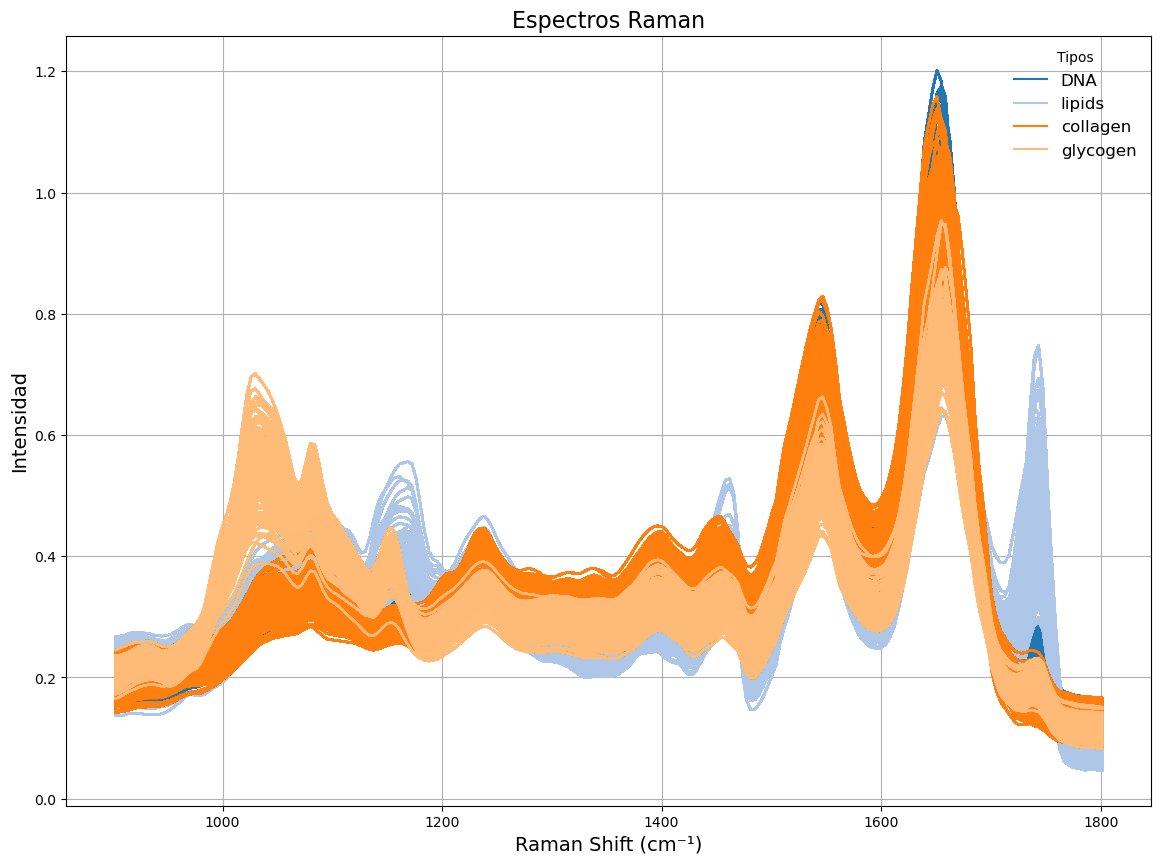

In [16]:
# Colores para cada tipo
colors = plt.cm.tab20.colors  # Una paleta de colores suficientemente grande
color_map = {unique: colors[i % len(colors)] for i, unique in enumerate(unique_types)}

# Graficar cada tipo una sola vez en la leyenda
plt.figure(figsize=(14, 10))

for unique_type in unique_types:
    # Filtrar las columnas correspondientes al tipo actual
    columns = [col for col in df.columns if col.startswith(unique_type)]
    
    # Graficar todas las columnas del tipo actual
    for col in columns:
        plt.plot(df['Ramanshift'], df[col], color=color_map[unique_type], alpha=0.6)
    
    # Agregar una entrada en la leyenda solo para el tipo (una vez)
    plt.plot([], [], label=unique_type, color=color_map[unique_type])  # Dummy plot for legend

# Etiquetas y leyendas
plt.title("Espectros Raman", fontsize=16)
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
plt.ylabel("Intensidad", fontsize=14)
plt.legend(title="Tipos", fontsize=12, loc='upper right', frameon=False)
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [17]:
# Filter the columns corresponding to the 'collagen' type
collagen_columns = [col for col in df.columns if col.startswith("collagen")]

# Plot only the columns of type 'collagen'
plt.figure(figsize=(14, 8))

for col in collagen_columns:
    plt.plot(df['Ramanshift'], df[col], label=col, color=color_map["collagen"], alpha=0.6)

# Configure the graph
plt.title("Espectros Raman - Collagen", fontsize=16)
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
plt.ylabel("Intensidad", fontsize=14)
plt.legend(title="Columnas", fontsize=10, loc='upper right', frameon=False)
plt.grid(True)

# Show the graph
plt.show()

ValueError: Image size of 1161x796490 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1400x800 with 1 Axes>